In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
color = sns.color_palette()

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
from load_data import DATA_PATH, TARGET_LABELS, load_month

In [3]:
def dummies_to_decimal(row):
    output = ''
    for v in row.values:
        output += str(int(v))
    return log(int(output,2)+1)

In [7]:
train_df = pd.DataFrame()
clients = None
cols = ['ncodpers', 'yearmonth']; cols.extend(TARGET_LABELS)
for i in range(17):
    print "Process %s month" % (i+1)
    df = load_month(i, False)
    if clients is None:
        clients = set(df['ncodpers'].unique())
    else:
        clients &= set(df['ncodpers'].unique())
    df['yearmonth'] = df['fecha_dato'].apply(lambda x: int(100*x.year + x.month))
    df = df[cols]
    df.loc[:, 'target_value'] = df[TARGET_LABELS].apply(dummies_to_decimal, axis=1)
    train_df = pd.concat([train_df, df], axis=0)
    
train_df = train_df[train_df['ncodpers'].isin(clients)]

Process 1 month
Process 2 month
Process 3 month
Process 4 month
Process 5 month
Process 6 month
Process 7 month
Process 8 month
Process 9 month
Process 10 month
Process 11 month
Process 12 month
Process 13 month
Process 14 month
Process 15 month
Process 16 month
Process 17 month


In [8]:
import os
train_df.to_csv(os.path.join(DATA_PATH, "train_all_targets.csv"), index=False, index_label=False)   

In [27]:
clients

{1048576,
 1048578,
 1048579,
 1048581,
 1048582,
 1048584,
 1048585,
 1048586,
 1048587,
 1048588,
 1048589,
 1048592,
 1048593,
 1048594,
 1048595,
 993009,
 174766,
 1048598,
 1048599,
 1048601,
 1048602,
 1048603,
 1048604,
 1048605,
 1048607,
 1048608,
 1048609,
 1048610,
 1048612,
 1048613,
 1048615,
 1048616,
 1048617,
 1048618,
 1048619,
 1048620,
 1048621,
 1048622,
 1048623,
 1048624,
 1048626,
 1048628,
 1048629,
 1048630,
 1048631,
 1048632,
 1048633,
 1048634,
 1048636,
 1048637,
 1048638,
 1048639,
 1048640,
 1048641,
 1048643,
 1048644,
 1048645,
 1048646,
 873825,
 1048648,
 1048649,
 1048650,
 1048651,
 1048652,
 1048653,
 1048655,
 1048656,
 1048657,
 1048658,
 1048659,
 1048661,
 1048662,
 1048663,
 1048664,
 1048666,
 1048669,
 1048671,
 1048672,
 1048673,
 1048674,
 1048675,
 1048676,
 1048677,
 1048678,
 1048679,
 1048680,
 1048681,
 1048682,
 1048683,
 1048684,
 1048685,
 1048686,
 1048687,
 1048688,
 1048689,
 1048691,
 1048692,
 1048693,
 1048694,
 1048696,
 10

In [32]:
train_df[train_df['ind_cder_fin_ult1'] > 0].head()
#train_df.tail()

,ncodpers,yearmonth,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,target_value
52045,1132625,201501,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0.0,0.0,0,14.961561
63079,1071645,201501,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,14.961556
65230,1070507,201501,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0.0,0.0,1,14.963538
98901,891670,201501,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0.0,0.0,1,14.269234
102536,880494,201501,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,14.961556


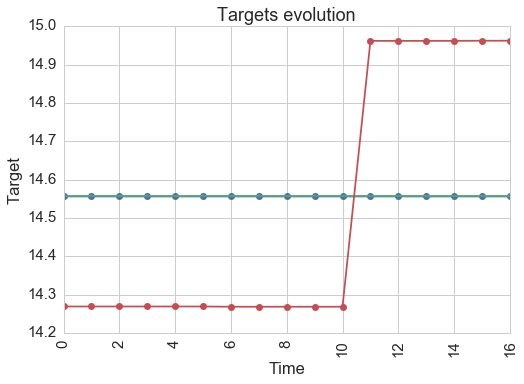

In [39]:

with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    plt.plot(train_df[train_df['ncodpers'].isin([1375586])]['target_value'].values,'-o')
    plt.plot(train_df[train_df['ncodpers'].isin([1050611])]['target_value'].values,'-x')
    plt.plot(train_df[train_df['ncodpers'].isin([891670])]['target_value'].values,'-o')
    sns.plt.title("Targets evolution")
    plt.ylabel("Target")
    plt.xlabel("Time")
    plt.xticks(rotation='vertical')